In [63]:
import pandas as pd
import numpy as np
import os
from glob import glob
import re
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [64]:
races = dict()

for path in glob('../../data/processed/*'):
    filename = os.path.basename(path)
    races[filename[0].upper()] = pd.read_csv(path, index_col=0)

In [65]:
protoss_df = races['P'].copy(deep=True)

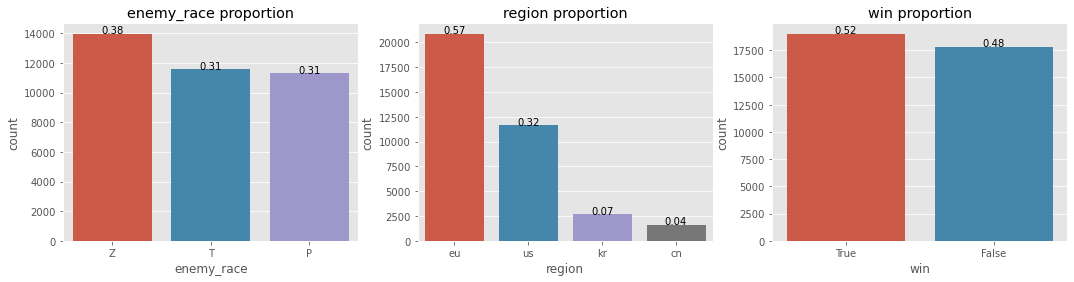

In [66]:
shape = (1,3)
fig = plt.figure(figsize=(18,4))

for i, feature in enumerate(['enemy_race', 'region', 'win']):
    ax = fig.add_subplot(*shape,i+1)
    ax.title.set_text('{} proportion'.format(feature))
    sns.countplot(data=protoss_df, x=feature, order=protoss_df[feature].value_counts().index, ax=ax)

    for p in ax.patches:
        height, width = p.get_height(), p.get_width()
        x, y = p.get_x()+width/2, height+6
        text = '{:1.2f}'.format(height/len(protoss_df))
        
        ax.text(x, y, text, ha='center')

plt.show()

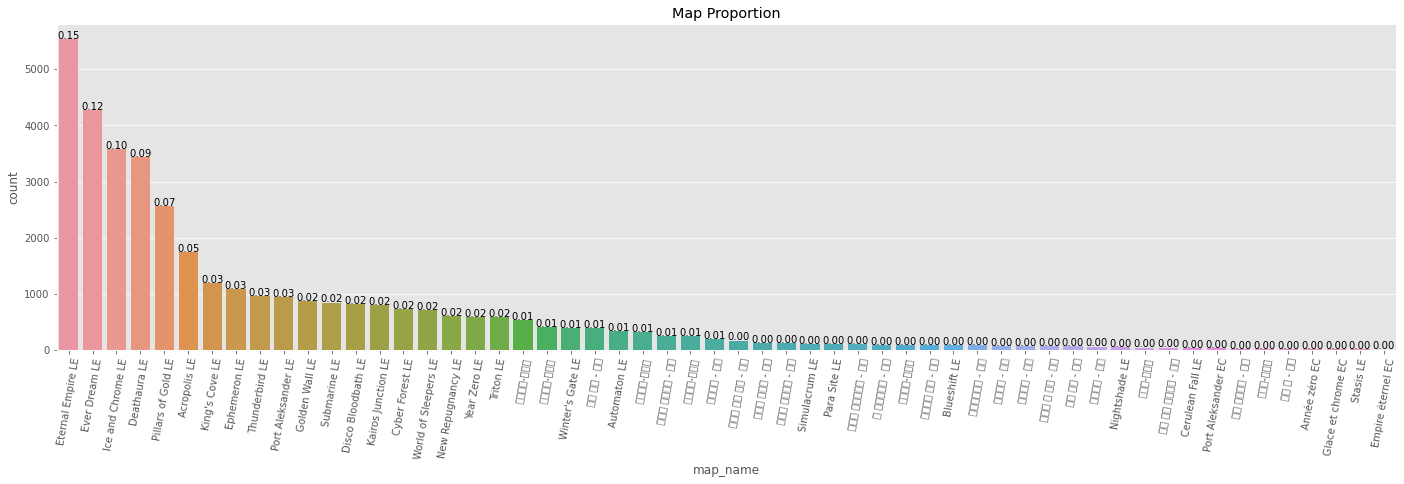

In [67]:
plt.figure(figsize=(24, 6))
ax = sns.countplot(data=protoss_df, x='map_name', order=protoss_df.map_name.value_counts().index)
plt.xticks(rotation=80)
plt.title('Map Proportion')

for p in ax.patches:
        height, width = p.get_height(), p.get_width()
        x, y = p.get_x()+width/2, height+6
        text = '{:1.2f}'.format(height/len(protoss_df))
        
        ax.text(x, y, text, ha='center')

plt.show()

In [77]:
pd.DataFrame(protoss_df.map_name.value_counts().sort_values(ascending=False)).head()

,map_name
Eternal Empire LE,5528
Ever Dream LE,4268
Ice and Chrome LE,3580
Deathaura LE,3437
Pillars of Gold LE,2557


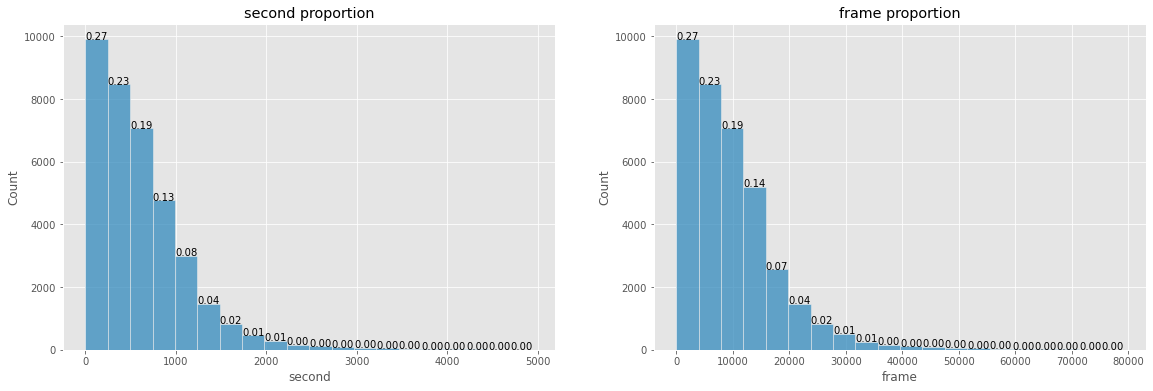

In [78]:
shape = (1,3)
fig = plt.figure(figsize=(30,6))

for i, feature in enumerate(['second','frame']):
    ax = fig.add_subplot(*shape,i+1)
    ax.title.set_text('{} proportion'.format(feature))
    sns.histplot(data=protoss_df, x=feature, bins=20, ax=ax)

    for p in ax.patches:
        height, width = p.get_height(), p.get_width()
        x, y = p.get_x()+width/2, height+6
        text = '{:1.2f}'.format(height/len(protoss_df))
        
        ax.text(x, y, text, ha='center') 

plt.show()